In [ ]:
import jax
import numpy as np
import math
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax.scipy.optimize import minimize
from jax import grad
import random

In [ ]:
def create_circ(radius, angles, xcenter, ycenter):
  x = []
  y = []
  for i in range(0,len(angles)):
    alpha = angles[i]
    y.append(radius * math.sin(alpha) + ycenter)
    x.append(radius * math.cos(alpha) + xcenter)
  return x, y

def add_noise(n):
  x_noise = []
  y_noise = []
  for i in range(0,n):
    x_noise.append(random.random())
    y_noise.append(random.random())

  return x_noise, y_noise


[]
8 8


(45.96633369868304, 53.3349364905389, 0.75, 28.249999999999996)

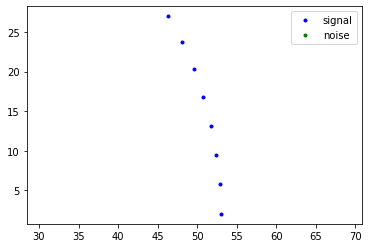

In [ ]:
angles = np.linspace(0, math.pi/6, 8)
radius = 50
xcenter = 3
ycenter = 2

n = 0

x = []
y = []
for i in range(0,len(angles)):
  alpha = angles[i]
  y.append(radius * math.sin(alpha) + ycenter)
  x.append(radius * math.cos(alpha) + xcenter)

x_noise = [random.randrange(np.round(np.min(x))-20, np.round(np.max(x))+20) for _ in range(n)]
print(x_noise)
y_noise = [random.randrange(np.round(np.min(y))-5, np.round(np.max(y))+5) for _ in range(n)]

print(len(x), len(y))
plt.plot(x,y, '.b', label = 'signal')
plt.plot(x_noise, y_noise, '.g', label = 'noise')
plt.plot()
plt.legend()
plt.axis('equal')
#plt.plot(xcenter, ycenter, 'r.')




In [ ]:
x, y = create_circ(50, angles, 3, 2)
print(len(x))
print(len(x_noise))

8
0


In [ ]:
x = x + x_noise
y = y + y_noise
print(len(x))

8


(45.9663330078125, 53.3349365234375, 0.75, 28.25)

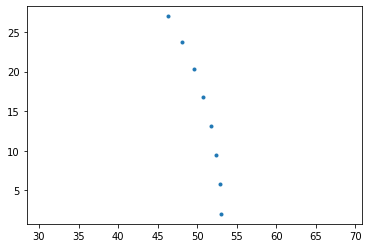

In [ ]:
plt.plot(x, y, '.')
plt.axis('equal')

In [ ]:
# fit standard

def func0(params, X ,Y):
  a, b , R = params
  return jnp.sqrt((X-a)**2 + (Y-b)**2) - R

def chisq0(params, x,y):
  return jnp.mean(func0(params,x,y)**2)

In [ ]:
# fit con 4.14

def func(params, X, Y):
  A, B, C, D = params
  return A * (X**2 + Y**2) + B * X + C * Y + D
def error(params, X, Y):
  A, B, C, D = params
  return 4*A*(A*(X**2 + Y**2) + B * X + C * Y + D) + B**2 + C**2 - 4*A*D
def chisq1(params, x, y):
  e = jax.grad(func)
  err = error(params, x, y)
  return jnp.mean((func(params, x,y)**2)/err**2)

In [ ]:
# fit con 2.9

def func(params, X, Y):
  A, B, C, D = params
  return A * (X**2 + Y**2) + B * X + C * Y + D

def chisq2(params, x, y):
  A,B,C,D = params
  err = 1 + jnp.sqrt(1 + 4*A*(A*(x**2 + y**2) + B * x + C * y + D))
  return jnp.mean(2*(func(params, x,y))/err)**2

In [ ]:
# fit con sezione 3.2
def func2(params, X, Y):
  A, D, theta = params
  return A * (X**2 + Y**2) + jnp.sqrt(1 + 4*A*D) * (X * jnp.cos(theta) + Y * jnp.sin(theta)) + D

def chisq3(params, x, y):
  A, D, theta = params
  return jnp.mean(func2(params,x,y)**2)

In [ ]:
x = np.array(x).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
results0 = minimize(chisq0, jnp.array([0.,0.,0.]), args = (x,y), method = 'BFGS')
results1 = minimize(chisq1, jnp.array([1.,1.,1.,1.]), args = (x,y), method = 'BFGS')
results2 = minimize(chisq2, jnp.array([1.,1.,1.,1.]), args = (x,y), method = 'BFGS')
results3 = minimize(chisq3, jnp.array([0., 0., 0.]), args = (x,y), method = 'BFGS')

In [ ]:
print(results1, results2)

OptimizeResults(x=Array([28.03454  ,  1.0038346,  1.0037801,  0.9906873], dtype=float32), success=Array(True, dtype=bool), status=Array(0, dtype=int32, weak_type=True), fun=Array(7.952501e-05, dtype=float32), jac=Array([-5.6734261e-06, -3.6848746e-11, -3.5971226e-11,  1.9894122e-09],      dtype=float32), hess_inv=Array([[ 1.0907670e+06,  1.5426497e+02,  1.5207349e+02, -3.7575916e+02],
       [ 1.5426497e+02,  1.0218172e+00,  2.1507464e-02, -5.3142905e-02],
       [ 1.5207349e+02,  2.1507464e-02,  1.0212024e+00, -5.2387960e-02],
       [-3.7575912e+02, -5.3142898e-02, -5.2387953e-02,  1.1294456e+00]],      dtype=float32), nfev=Array(18, dtype=int32, weak_type=True), njev=Array(18, dtype=int32, weak_type=True), nit=Array(17, dtype=int32, weak_type=True)) OptimizeResults(x=Array([ -51.399548, -193.6189  ,  -55.602604,   -2.846299], dtype=float32), success=Array(False, dtype=bool), status=Array(3, dtype=int32, weak_type=True), fun=Array(2078.5222, dtype=float32), jac=Array([24.904297 , 40.

In [ ]:
a = results0[0][0]
b = results0[0][1]
R = results0[0][2]
print(a,b,R)

3.0001028 2.0000284 49.999893


In [ ]:
A1 = results1[0][0]
B1 = results1[0][1]
C1 = results1[0][2]
D1 = results1[0][3]

fitted_xcenter1 = -B1/(2*A1)
fitted_ycenter1 = -C1/(2*A1)
fitted_radius1 = 1/(2* np.abs(A1))

print(fitted_xcenter1, fitted_ycenter1, fitted_radius1)

-0.017903533 -0.01790256 0.017835141823408937


In [ ]:
A2 = results2[0][0]
B2 = results2[0][1]
C2 = results2[0][2]
D2 = results2[0][3]

fitted_xcenter2 = -B2/(2*A2)
fitted_ycenter2 = -C2/(2*A2)
fitted_radius2 = 1/(2* np.abs(A2))

print(fitted_xcenter2, fitted_ycenter2, fitted_radius2)

-1.8834689 -0.5408861 0.009727712082521683


In [ ]:
A3 = results3[0][0]
D3 = results3[0][1]
theta3 = results3[0][2]

B3 = jnp.sqrt(1+4*A3*D3)*jnp.cos(theta3)
C3 = jnp.sqrt(1+4*A3*D3)*jnp.sin(theta3)

fitted_xcenter3 = -B3/(2*A3)
fitted_ycenter3 = -C3/(2*A3)
fitted_radius3 = 1/(2*np.abs(A3))

print(fitted_xcenter3, fitted_ycenter3, fitted_radius3)

0.010018608 0.015832216 1.7346877486159902e-06


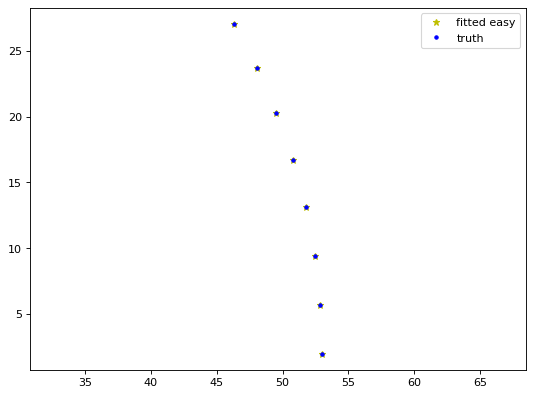

In [ ]:
fitted_x0 , fitted_y0 = create_circ(R, angles, a,b)
fitted_x1, fitted_y1 = create_circ(fitted_radius1, angles, fitted_xcenter1, fitted_ycenter1)
fitted_x2, fitted_y2 = create_circ(fitted_radius2, angles, fitted_xcenter2, fitted_ycenter2)
fitted_x3, fitted_y3 = create_circ(fitted_radius3, angles, fitted_xcenter3, fitted_ycenter3)

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(fitted_x0, fitted_y0, 'y*', label = 'fitted easy')
#plt.plot(fitted_x1, fitted_y1, 'g.', label = 'fitted 4.14')
#plt.plot(fitted_x2, fitted_y2, 'r.', label = 'fitted 2.9')
#plt.plot(fitted_x3, fitted_y3, 'k.', label = 'fitted A,D,theta')
plt.plot(x, y, 'b.', label='truth')
#plt.plot(xcenter, ycenter, 'r*')
#plt.plot(a,b, 'g*')
plt.axis('equal')
plt.legend()
plt.show()